# THE NORMAL DISTRIBUTION

*Notes by Andres F.R.*

--------------

TODO:

* Proof for marginalization. ATM working on "truncated of inv is inv of truncated" problem, try to solve with diagonalization (S= $P^{-1}DP$) due to its easy inverse. Once that is done:
  1. finish proof for marginalization.
  2. Adapt expected value and sigma to multivar. problem using marginalization (talk about cov?)
  3. Entropy with proof, relation to variance (gaussian maximizes entropy?). How does it scale with dimensions?
  4. KL with proof, relation to entropy (and intuition to variances, mus). How does it scale with dimensions?

* PDF and CDF for uni and multivariate
* Expected value and variance
* GMM
* KL divergence between 2 gaussians (from simple case to GMM multivar)

In [7]:
import torch
#import pyro
#import pgmpy
import matplotlib.pyplot as plt

#
%matplotlib notebook
from ipywidgets import interact, interactive # fixed, interact_manual
import ipywidgets as widgets


print("ok")

ok


--------------

# PDF

### Univariate:

$
\mathcal{N}(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} exp(-\frac{(x-\mu)^2}{2\sigma^2})
$

Note that $(x-\mu)^2$ is the square of the **euclidean distance** from $\mu$ to x.

### Multivariate:

For $x,\, \mu \, \in \mathbb{R}^D, \quad S \, \in \mathbb{R}^{D\times D}$

Where $S$ is the covariance matrix (positive semidefinite):

$
\begin{pmatrix}
\sigma_{1}^2 & Cov(X_1, X_2) & \dots \\
Cov(X_2, X_1) & \sigma_{2}^2 & \dots \\
\vdots & \vdots & \ddots \\
\end{pmatrix}
$

$
\mathcal{N}(x; \mu, S) = \frac{1}{\sqrt{(2\pi)^D |S|}} exp(-\frac{1}{2}(x-\mu)^T S^{-1} (x-\mu))
$


Note that $(x-\mu)^T \Sigma^{-1} (x-\mu)$ is the square of the **Mahalanobis distance** from $\mu$ to x. If $S$ is the identity matrix, the Mahalanobis equals the euclidean distance. Also, $|S|$ is the determinant of $S$.

### Multivariate with diagonal $S$:

* The determinant of a diagonal matrix is the product of the diagonal entries.
* The inverse of a diagonal matrix is computed by inverting each separate entry in the diagonal.

$$
\begin{align}
\mathcal{N}(x; \mu, S) &= \frac{1}{\sqrt{(2\pi)^D \prod_d \sigma_d^2}} exp(-\frac{1}{2}(x-\mu)^T S^{-1} (x-\mu)) \\
&= \frac{1}{\prod_d \sqrt{(2\pi)} \prod_d \sigma_d} exp(-\frac{1}{2} \cdot \sum_d \frac{(x_d-\mu_d)^2}{\sigma_d^2})\\
&= \frac{1}{\prod_d\sqrt{2\pi \sigma_d^2}} \cdot \prod_d exp(-\frac{1}{2} \frac{(x_d-\mu_d)^2}{\sigma_d^2})\\
&= \prod_d \Bigg[ \frac{1}{\sqrt{2\pi \sigma_d^2}} exp(-\frac{1}{2} \frac{(x_d-\mu_d)^2}{\sigma_d^2}) \Bigg]\\
&= \prod_d \mathcal{N}(x_d; \mu_d, \sigma_d^2)
\end{align}
$$


### Properties of $S$:

If we assume that all $\sigma_d$ are strictly positive, then $S$ is a symmetric, square, positive definite matrix and:

* It has an inverse $\Gamma$ of same dimensionality
* It has a Cholesky decomposition $\Sigma = U U^T$, where U is lower triangular
* It is diagonalizable due to its symmetry
* $U$ is positive definite so $U^-1$ exists, and $|U| = \prod U_{dd}$

The decomposition into a triangular matrix is helpful for several proofs.

#### Variance of first dimension:

$
S_{11} = \sigma_1^2 = U_{11} \cdot U_{11}^T = U_{11}^2 \Rightarrow U_{11} = U_{11}^T = \sigma_1
$

#### Inverse of $\sigma_1$ :

$
\Gamma_{11} = (UU^T)_{11}^{-1} = \langle U_{1,:}, U_{:,1}^T \rangle^{-1} = (U_{11} \cdot U_{11}^T)^{-1} = \frac{1}{U_{11}^2} = \frac{1}{\sigma_1^2}
$

#### Determinant decomposition:

$
|S| = |UU^T| = |U| \cdot |U^T| = \prod_{d=1}^D U_{dd} \prod_{d=1}^D U_{dd}^T = \prod_{d=1}^D U_{dd}^2 = \sigma_1^2 \prod_{d=1}^D U_{dd}^2 = \sigma_1^2 |S_{2:,2:}|
$

#### Inverse of truncation is truncation of inverse:

Given $\Gamma := S^{-1}$, the following holds: $\Gamma_{d:, d:} = S_{d:, d:}^{-1}$ i.e. truncation of the inverse is still a valid inverse.


# CDF

Note that in this case $\Phi$ refers to any gaussian, not only the standard. Also note that there is no closed form for the integral, but there are [numerical approximations](https://en.wikipedia.org/wiki/Normal_distribution#Numerical_approximations_for_the_normal_CDF).

$
\Phi(a; \mu, \sigma^2) = P(\mathcal{N}(x; \mu, \sigma^2) \leq a) = \int_{-\infty}^{a} \mathcal{N}(x; \mu, \sigma^2) dx
$


## CCDF

Complementary CDF, also "tail distribution" or "excedance":

$
\bar{\Phi}(a; \mu, \sigma^2) = P(\mathcal{N}(x; \mu, \sigma^2) \geq a) = \int_{a}^{\infty} \mathcal{N}(x; \mu, \sigma^2) dx = 1 - \Phi(a; \mu, \sigma^2)
$


# EXPECTED VALUE

Note that for any PDF $f(x)$:

$
\mathbb{E}[f] = \int_{-\infty}^{\infty} x \cdot f(x) dx
$

### Univariate:


$$
\begin{align}
\mathbb{E}[\mathcal{N}(x; \mu, \sigma)] &= \int_{-\infty}^{\infty} x \cdot \mathcal{N}(x; \mu, \sigma) dx \\
   &= \int_{-\infty}^{\infty} x \cdot \frac{1}{\sqrt{2\pi \sigma^2}} exp(-\frac{(x-\mu)^2}{2\sigma^2}) dx\\
   &\text{we substitute }z := x-\mu \text{ (dz doesn't get affected by this transformation)}\\
   &= \int_{-\infty}^{\infty} (z+\mu) \cdot \frac{1}{\sqrt{2\pi \sigma^2}} exp(-\frac{z^2}{2\sigma^2}) dz \\
   &= \int_{-\infty}^{\infty} z \cdot \frac{1}{\sqrt{2\pi \sigma^2}} exp(-\frac{z^2}{2\sigma^2}) dz + \int_{-\infty}^{\infty} \mu \cdot \frac{1}{\sqrt{2\pi \sigma^2}} exp(-\frac{z^2}{2\sigma^2}) dz\\
   &\text{first integral has odd symmetry, thus vanishes}\\
   &= 0 + \mu \int_{-\infty}^{\infty} \cdot \frac{1}{\sqrt{2\pi \sigma^2}} exp(-\frac{z^2}{2\sigma^2}) dz \\
   &\text{Integral of a PDF (gaussian) is 1}\\
   &= 0 + \mu \cdot 1\\
   &= \mu
\end{align}
$$
$\square$

### Multivariate:

The expected value for the gaussian trivially follows from $\mathbb{E}[x_d] = \int_{\mathbb{X}_d} x_d f_{marg}(x_d) dx_d = \mathbb{E}[x]_d$ (see proof below).

$$
\begin{align}
\mathbb{E}[\mathcal{N}(x_i; \mu, S)] &= \mathbb{E}[\mathcal{N}(x_i; \mu_i, \sigma_i^2)] = \mu_i
\end{align}
$$

### Multivariate with diagonal $S$:

$$
\begin{align}
\mathbb{E}[\mathcal{N}(x; \mu, S)] &= \int_{-\infty}^{\infty} x \cdot \mathcal{N}(x; \mu, S) dx \\
   &= \int_{-\infty}^{\infty} x \cdot \frac{1}{\sqrt{(2\pi)^D |S|}} exp(-\frac{(x-\mu)^T S^{-1} (x-\mu)}{2\sigma^2})dx\\
   &\text{we substitute }z := x-\mu\\
   &= \int_{-\infty}^{\infty} (z+\mu) \cdot \frac{1}{\sqrt{(2\pi)^D |S|}} exp(-\frac{z^T S^{-1} z}{2\sigma^2})  dz \\
   &= \int_{-\infty}^{\infty} z \cdot \frac{1}{\sqrt{(2\pi)^D |S|}} exp(-\frac{z^T S^{-1} z}{2\sigma^2})  dz + \int_{-\infty}^{\infty} \mu \cdot \frac{1}{\sqrt{(2\pi)^D |S|}} exp(-\frac{z^T S^{-1} z}{2\sigma^2})  \\
   &\text{first integral has odd symmetry, thus vanishes}\\
   &= 0 + \mu \int_{-\infty}^{\infty} \cdot \frac{1}{\sqrt{2\pi \sigma^2}} exp(-\frac{z^2}{2\sigma^2}) dz \\
   &\text{Integral of a PDF (gaussian) is 1}\\
   &= 0 + \mu \cdot 1\\
   &= \mu
\end{align}
$$




# VARIANCE

Note that for any PDF $f(x)$:

$
Var(f) = \mathbb{E}[(f-\mathbb{E}[f])^2] = \int_{-\infty}^{\infty} (x - \mu)^2 \cdot f(x) dx
$

Where $\mu := \mathbb{E}[f]$.


Also note that $Var(f) = \mathbb{E}[f^2] - \mathbb{E}[f]^2$ (see proof below)



### Univariate:


$$
\begin{align}
Var(\mathcal{N}(x; \mu, \sigma)) &= \mathbb{E}[\mathcal{N}^2] - \mu^2 \\
   &= \int_{-\infty}^{\infty} x^2 \cdot \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx - \mu^2\\
   &= \frac{1}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{\infty} x^2  e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx - \mu^2\\
   &\text{we substitute }z := \frac{(x-\mu)}{\sqrt(2)\sigma} \text{  and therefore } x:=\sqrt{2}\sigma z + \mu, \; dx = \sqrt{2}\sigma dz \\
   &= \frac{\sqrt{2} \sigma}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{\infty} (\sqrt{2}\sigma z + \mu)^2  e^{-z^2} dz - \mu^2 \\
   &= \frac{1}{\sqrt{\pi}} \int_{-\infty}^{\infty} (\sqrt{2}\sigma z + \mu)^2  e^{-z^2} dz - \mu^2 \\
   &= \frac{1}{\sqrt{\pi}} \Bigg[ \int_{-\infty}^{\infty} 2\sigma^2 z^2 \cdot e^{-z^2} dz +  \int_{-\infty}^{\infty} 2\sqrt{2}\sigma z \mu \cdot  e^{-z^2} dz + \int_{-\infty}^{\infty} \mu^2 \cdot e^{-z^2} dz \Bigg] - \mu^2 \\
   &= \frac{1}{\sqrt{\pi}} \Bigg[ 2\sigma^2 \int_{-\infty}^{\infty}  z^2  e^{-z^2} dz + 2\sqrt{2}\sigma \mu \int_{-\infty}^{\infty}  z   e^{-z^2} dz + \mu^2 \int_{-\infty}^{\infty}  e^{-z^2} dz \Bigg] - \mu^2 \\
    &\text{Gaussian integral}\\
    &= \frac{1}{\sqrt{\pi}} \Bigg[ 2\sigma^2 \int_{-\infty}^{\infty}  z^2  e^{-z^2} dz + 2\sqrt{2}\sigma \mu \int_{-\infty}^{\infty}  z   e^{-z^2} dz + \mu^2 \sqrt{\pi} \Bigg] - \mu^2 \\
    &\text{mid integral has odd symmetry and vanishes}\\
    &= \frac{1}{\sqrt{\pi}} \Bigg[ 2\sigma^2 \int_{-\infty}^{\infty}  z^2  e^{-z^2} dz + 2\sqrt{2}\sigma \mu \cdot 0 + \mu^2 \sqrt{\pi} \Bigg] - \mu^2 \\
     &= \frac{1}{\sqrt{\pi}} \Bigg[ 2\sigma^2 \int_{-\infty}^{\infty}  z^2  e^{-z^2} dz \Bigg] + \mu^2 - \mu^2 \\
     &= \frac{2\sigma^2 }{\sqrt{\pi}} \int_{-\infty}^{\infty}  z^2  e^{-z^2} dz\\
     &\text{int. by parts: } u := z,\; v=ze^{-z^2}\\
         &= \frac{2\sigma^2 }{\sqrt{\pi}} \Bigg[ \, \Big| t \cdot \frac{-e^{-z^2}}{2} \Big|_{-\infty}^{\infty} - \int_{-\infty}^{\infty} 1 \cdot \frac{-e^{-z^2}}{2} dz \Bigg]\\
     &\text{First integral has odd symmetry and vanishes, second is Gaussian int.}\\
     &= \frac{2\sigma^2 }{\sqrt{\pi}} \frac{\sqrt{\pi}}{2} \; = \; \sigma^2\\
\end{align}
$$

### Multivariate:





--------------

# MISC PROOFS


### Variance of a distribution is expected value of square minus square of expected value:

$Var(f) = \mathbb{E}[f^2] - \mathbb{E}[f]^2$

This holds because of the linearity of $\mathbb{E}$:

$$
\begin{align}
\mathbb{E}[(f-\mu)^2] &= \int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx \\
   &= \int_{-\infty}^{\infty} x^2 f(x) dx + \mu^2 \int_{-\infty}^{\infty} f(x) dx - 2\mu \int_{-\infty}^{\infty} x f(x) dx \\
   &= \mathbb{E}[f^2] + \mu^2 \cdot 1 -2\mu \cdot \mathbb{E}[f]\\
   &= \mathbb{E}[f^2] + \mu^2 -2\mu^2 = \mathbb{E}[f^2] - \mu^2\\
\end{align}
$$
$\square$


### Expected value for a given component in a joint D-dimensional distribution equals the expected value of the component's marginal distribution**:

$\mathbb{E}[x_d] = \int_{\mathbb{X}_d} x_d f_{marg}(x_d) dx_d$


$$
\begin{align}
\mathbb{E}[x_d] &= \int_{\mathbb{X}_1} \dots \int_{\mathbb{X}_d} \dots  \int_{\mathbb{X}_D}  x_d f(x_1, \dots, x_d, \dots, x_D) dx_1 \dots dx_d \dots dx_D\\
   &\text{reordering of integrals (Fubini) and extracting constant factor}\\
   &= \int_{\mathbb{X}_d} x_d \Bigg[ \int_{\mathbb{X}_1} \dots \int_{\mathbb{X}_D}  x_d f(x_1, \dots, x_d, \dots, x_D) dx_1 \dots dx_D \Bigg] dx_d \\
   &\text{Probability dist. marginalization}\\
   &= \int_{\mathbb{X}_d} x_d f_{marg}(x_d) dx_d \\
\end{align}
$$
$\square$


### Marginalization of D-dimensional gaussian: if $\vec{x} \sim \mathcal{N}(\vec{\mu}, S)$ then $x_d \sim \mathcal{N}(\mu_d, S_{dd})$

To show that $x_d \sim \mathcal{N}(\mu_d, S_{dd})$ it suffices to show that marginalizing the first dimension of a D-dimensional gaussian results in a $(D-1)$-dimensional gaussian characterizable by $x_{2:}, \mu_{2:}, S_{2:, 2:}$, i.e. simply discards all information about the marginalized dimension and retains the rest. Repeating the process $D-1$ times, setting the first dimension to be anything except $d$, results in $x_d \sim \mathcal{N}(\mu_d, S_{dd})$ for any arbitrary $d$.


For that the following properties are useful:

* $|S| = \sigma_1^2 |S_{2:, 2:}|$ (see proof using Cholesky decomposition)
* $\Gamma := S^{-1}$, and $S_{d:, d:}^{-1} = \Gamma_{d:, d:}$ (due to linear independence). 
* The dimensions in $x, \mu, S$ can be shuffled without affecting the marginalization (i.e. the dimension to be marginalized can be arbitrarily set as $x_1$. 



$$
\begin{align}
\mathcal{N}(x; \mu, S) &= \frac{1}{\sqrt{(2\pi)^D |S|}} exp(-\frac{1}{2}(x-\mu)^T S^{-1} (x-\mu))\\
   &\text{Determinant properties, and replace } z := x-\mu \\
   &= \frac{1}{\sqrt{2\pi (2\pi)^{D-1} \sigma_1^2 |S_{2:,2:}|}} exp(-\frac{1}{2} z^T \Gamma z)\\
   &= \frac{1}{\sqrt{2\pi\sigma_1^2}} \frac{1}{\sqrt{(2\pi)^{D-1} |S_{2:,2:}|}} exp \Bigg( -\frac{1}{2} \Big( z_1^T \Gamma_{11} z_1 + z_{2:}^T \Gamma_{2:,2:} z_{2:} + 2 z_1 \langle \Gamma_{1,2:}, z_{2:} \rangle \Big) \Bigg)\\
   &= \frac{1}{\sqrt{2\pi\sigma_1^2}} exp(-\frac{1}{2} z_1^T \Gamma_{11} z_1) \frac{1}{\sqrt{(2\pi)^{D-1} |S_{2:,2:}|}} exp (-\frac{1}{2} z_{2:}^T \Gamma_{2:,2:} z_{2:}) \cdot exp(-z_1 \langle \Gamma_{1,2:}, z_{2:} \rangle)\\
   &= \mathcal{N}(x_1; \mu_1, \sigma_1^2) \mathcal{N}(x_{2:}; \mu_{2:}, S_{2:,2:})
\end{align}
$$



--------------

In [8]:
PI = 3.14159265359

def gaussian_pdf_univariate(x, mu, sigma):
    """
    gaussian_pdf(torch.linspace(-1, 1, 9), 0, 1)
    """
    var = sigma ** 2
    factor = (2 * PI * var) ** -0.5
    dist = -0.5 * (((x - mu) / sigma) ** 2)
    return factor * torch.exp(dist)
    
class InteractivePlot():
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        
class TwoGaussians(InteractivePlot):
    def plot(self, mu1, sigma1, mu2, sigma2,
                      min_x=-10, max_x=10, resolution=100):
        """
        """
        x = torch.linspace(min_x, max_x, resolution)
        pdf1 = gaussian_pdf_univariate(x, mu1, sigma1)
        pdf2 = gaussian_pdf_univariate(x, mu2, sigma2)
        self.ax.clear()
        self.ax.fill_between(x.numpy(), pdf1.numpy(), color=(0,1,0,0.1))
        self.ax.fill_between(x.numpy(), pdf2.numpy(), color=(1,0,0,0.1))


<IPython.core.display.Javascript object>


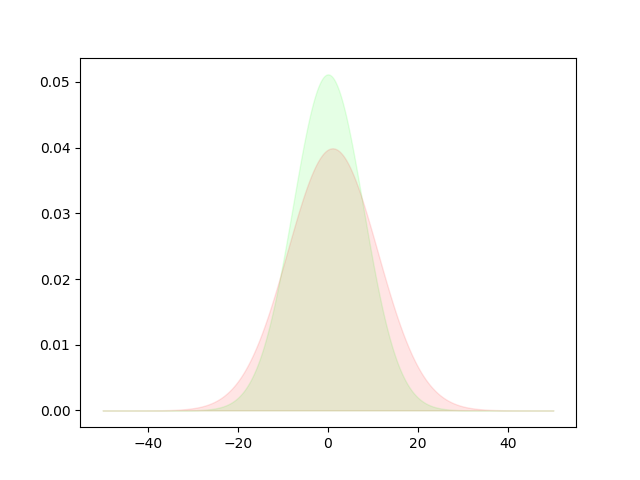

interactive(children=(FloatSlider(value=0.0, description='mu1', max=10.0, min=-10.0), FloatSlider(value=1.0, d…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [10]:
interact(TwoGaussians().plot,
         mu1=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
         mu2=widgets.FloatSlider(min=-10, max=10, step=0.1, value=1),
         sigma1=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1),
         sigma2=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=2),
         min_x=widgets.FloatSlider(min=-100, max=0, step=0.1, value=-50),
         max_x=widgets.FloatSlider(min=0, max=100, step=0.1, value=50),
         resolution=widgets.IntSlider(min=1, max=1000, step=1, value=500))

--------------

$\alpha=\beta$

--------------

$\alpha=\beta$

--------------

$\alpha=\beta$

In [5]:
test = 1
print(test)

1


--------------

$\alpha=\beta$

In [5]:
test = 1
print(test)

1


--------------